Mekkora részt ismert fel a Kraken2 a FengQ datasetben?

In [2]:
import pandas as pd
import os
import seaborn as sns
#from skbio.diversity import alpha_diversity
#from skbio.diversity import beta_diversity
#from skbio import TreeNode
from io import StringIO
#from skbio.stats.ordination import pcoa
from skbio.stats.composition import ancom
import math


In [3]:
path_kraken = '//gfs/data/curated_metagenomes_kraken2/'

files_kraken = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path_kraken):
    for file in f:
        if '.csv' in file:
            files_kraken.append(os.path.join(path_kraken, file))
print(files_kraken)

['//gfs/data/curated_metagenomes_kraken2/RampelliS_2015.csv', '//gfs/data/curated_metagenomes_kraken2/AsnicarF_2017.csv', '//gfs/data/curated_metagenomes_kraken2/ChngKR_2016.csv', '//gfs/data/curated_metagenomes_kraken2/FengQ_2015.csv', '//gfs/data/curated_metagenomes_kraken2/Heitz-BuschartA_2016.csv', '//gfs/data/curated_metagenomes_kraken2/KarlssonFH_2013.csv', '//gfs/data/curated_metagenomes_kraken2/LeChatelierE_2013.csv', '//gfs/data/curated_metagenomes_kraken2/LiuW_2016.csv', '//gfs/data/curated_metagenomes_kraken2/LomanNJ_2013.csv', '//gfs/data/curated_metagenomes_kraken2/Obregon-TitoAJ_2015.csv', '//gfs/data/curated_metagenomes_kraken2/QinJ_2012.csv', '//gfs/data/curated_metagenomes_kraken2/QinN_2014.csv', '//gfs/data/curated_metagenomes_kraken2/SchirmerM_2016.csv', '//gfs/data/curated_metagenomes_kraken2/VatanenT_2016.csv', '//gfs/data/curated_metagenomes_kraken2/VogtmannE_2016.csv', '//gfs/data/curated_metagenomes_kraken2/XieH_2016.csv', '//gfs/data/curated_metagenomes_kraken2

In [4]:
def get_data_for_sample(path_to_file):
    dataset = path_to_file.split('/')[-1]
    df = pd.read_csv(path_to_file, delimiter = ',')
    df['Dataset'] = dataset
    df["Name"] = [n.strip() for n in df["Name"]]
    return df

In [5]:
d = get_data_for_sample('//gfs/data/curated_metagenomes_kraken2/FengQ_2015.csv')

In [11]:
d.head()

,Unnamed: 0,Sample_ID,Dataset,Rank,Name,Abundance,STUDY_CONDITION,BODY_SITE,SUBJECTID,COUNTRY,DISEASE,AGE,AGE_CATEGORY
0,0,ERR688526,FengQ_2015.csv,U,unclassified,70.88,adenoma,stool,SID31282,AUT,adenoma;fatty_liver,63,adult
1,1,ERR688526,FengQ_2015.csv,R,root,29.12,adenoma,stool,SID31282,AUT,adenoma;fatty_liver,63,adult
2,2,ERR688526,FengQ_2015.csv,R1,cellular organisms,29.11,adenoma,stool,SID31282,AUT,adenoma;fatty_liver,63,adult
3,3,ERR688526,FengQ_2015.csv,D,Bacteria,29.05,adenoma,stool,SID31282,AUT,adenoma;fatty_liver,63,adult
4,4,ERR688526,FengQ_2015.csv,D1,Terrabacteria group,25.38,adenoma,stool,SID31282,AUT,adenoma;fatty_liver,63,adult


In [10]:
d.loc[d["Name"] == "unclassified"]["Abundance"].mean()

65.25551948051948

In [ ]:
ax = sns.barplot(x="time", y="tip", data=tips,
...                  order=["Dinner", "Lunch"])

Mekkora részt ismert fel a Kraken2 az összes datasetben?

In [50]:
unclass_dict = {}
df_list = []
for file in files_kraken:
    d = get_data_for_sample(file)
    try:
        dataset_name = d.Dataset.drop_duplicates()[0].split('.')[0]
        print(dataset_name)
        df_file = d.loc[d["Name"] == "unclassified"][["Sample_ID","Dataset", "Abundance", "BODY_SITE"]]
        df_list.append(df_file)
    
        unc = d.loc[d["Name"] == "unclassified"]["Abundance"].mean()
        unclass_dict[dataset_name] = unc        
    except:
        print(d.head())
merged = pd.concat(df_list)

RampelliS_2015
AsnicarF_2017
ChngKR_2016
FengQ_2015
Heitz-BuschartA_2016
Empty DataFrame
Columns: [Unnamed: 0, Sample_ID, Dataset, Rank, Name, Abundance, STUDY_CONDITION, BODY_SITE, SUBJECTID, COUNTRY, DISEASE, AGE, AGE_CATEGORY]
Index: []
LeChatelierE_2013
LiuW_2016
LomanNJ_2013
Obregon-TitoAJ_2015
QinJ_2012
QinN_2014
SchirmerM_2016
VatanenT_2016
VogtmannE_2016
XieH_2016
Empty DataFrame
Columns: [Unnamed: 0, Sample_ID, Dataset, Rank, Name, Abundance, STUDY_CONDITION, BODY_SITE, SUBJECTID, COUNTRY, DISEASE, AGE, AGE_CATEGORY]
Index: []
ZellerG_2014


In [38]:
unclass_dict

{'RampelliS_2015': 82.35894736842106,
 'AsnicarF_2017': 40.595000000000006,
 'ChngKR_2016': 16.62089743589744,
 'FengQ_2015': 65.25551948051948,
 'Heitz-BuschartA_2016': 69.12037735849057,
 'LeChatelierE_2013': 74.96878991596638,
 'LiuW_2016': 66.71981818181818,
 'LomanNJ_2013': 39.83176470588236,
 'Obregon-TitoAJ_2015': 78.89310344827585,
 'QinJ_2012': 59.29492537313433,
 'QinN_2014': 56.961139240506334,
 'SchirmerM_2016': 68.6487898089172,
 'VatanenT_2016': 43.93798726114649,
 'VogtmannE_2016': 63.82857142857143,
 'XieH_2016': 64.78924,
 'ZellerG_2014': 66.81781395348838}

In [39]:
merged.head()

,Sample_ID,Dataset,Abundance
0,SRR1930123,RampelliS_2015.csv,89.48
8710,SRR1929484,RampelliS_2015.csv,83.01
17033,SRR1927149,RampelliS_2015.csv,92.30
25151,SRR1929563,RampelliS_2015.csv,88.69
33209,SRR1930121,RampelliS_2015.csv,86.93


TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

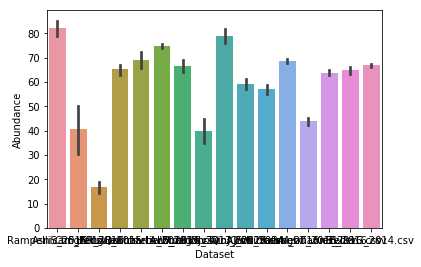

In [41]:
g = sns.barplot(x="Dataset", y="Abundance", data=merged)

In [52]:
merged["Classified"] = 100 - merged["Abundance"]

In [177]:
merged["Dataset"].drop_duplicates()

0          RampelliS_2015.csv
0           AsnicarF_2017.csv
0             ChngKR_2016.csv
0              FengQ_2015.csv
0    Heitz-BuschartA_2016.csv
0       LeChatelierE_2013.csv
0               LiuW_2016.csv
0            LomanNJ_2013.csv
0     Obregon-TitoAJ_2015.csv
0               QinJ_2012.csv
0               QinN_2014.csv
0          SchirmerM_2016.csv
0           VatanenT_2016.csv
0          VogtmannE_2016.csv
0               XieH_2016.csv
0            ZellerG_2014.csv
Name: Dataset, dtype: object

In [178]:
m2 = merged.loc[[d in ["FengQ_2015.csv", "VogtmannE_2016.csv", "QinJ_2012.csv"] for d in merged["Dataset"]]]

In [179]:
m2["Dataset"] = [d.split('.')[0] for d in m2["Dataset"]]

/gfs/progs/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
m2.head()

,Sample_ID,Dataset,Abundance,BODY_SITE,Classified
0,ERR688526,FengQ_2015,70.88,stool,29.12
7878,ERR688508,FengQ_2015,61.95,stool,38.05
15709,ERR688511,FengQ_2015,60.77,stool,39.23
23054,ERR688505,FengQ_2015,63.94,stool,36.06
30630,ERR688517,FengQ_2015,85.09,stool,14.91


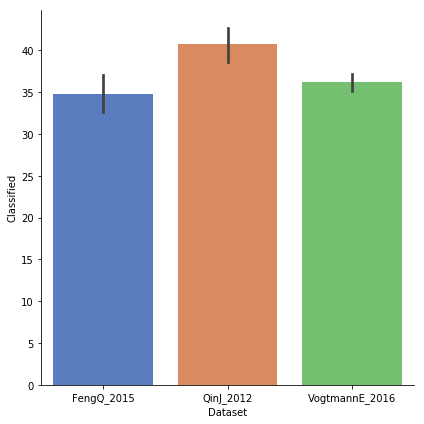

In [184]:
g = sns.catplot(x="Dataset", y="Classified", data=m2,
                height=6, kind="bar", palette="muted")
#g.set_xticklabels(rotation=45)
g.savefig("Kraken_CRC_classified.png")

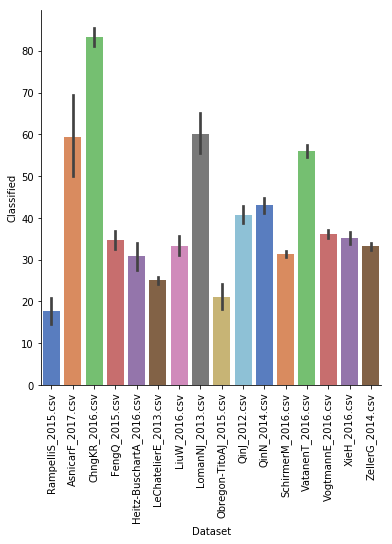

In [54]:
g = sns.catplot(x="Dataset", y="Classified", data=merged,
                height=6, kind="bar", palette="muted")
g.set_xticklabels(rotation=90)

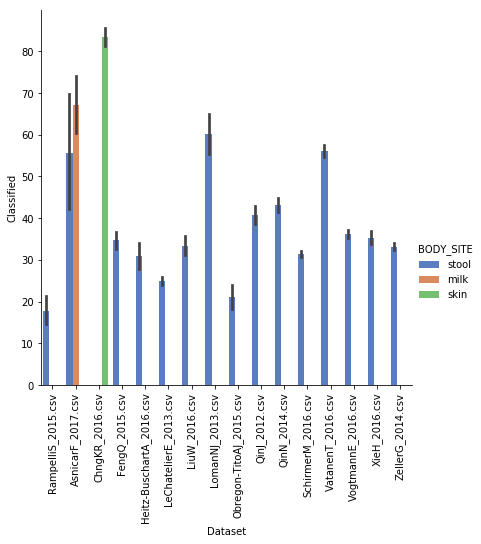

In [53]:
g = sns.catplot(x="Dataset", y="Classified", hue="BODY_SITE", data=merged,
                height=6, kind="bar", palette="muted")
g.set_xticklabels(rotation=90)

Mekkora részt ismert fel a metphlan?

In [56]:
path_metaphlan = '//gfs/data/curated_metagenomes_metaphlan2/'

files_metaphlan = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path_metaphlan):
    for file in f:
        if '.csv' in file:
            files_metaphlan.append(os.path.join(path_metaphlan, file))
print(files_metaphlan)

['//gfs/data/curated_metagenomes_metaphlan2/AsnicarF_2017.csv', '//gfs/data/curated_metagenomes_metaphlan2/ChngKR_2016.csv', '//gfs/data/curated_metagenomes_metaphlan2/FengQ_2015.csv']


In [61]:
df_list_m = []
for file in files_kraken:
    d = get_data_for_sample(file)
    d = d[["Sample_ID", "Dataset", "STUDY_CONDITION"]].drop_duplicates()
    df_list_m.append(d)
merged_m = pd.concat(df_list_m)

In [63]:
merged_m.head()

,Sample_ID,Dataset,STUDY_CONDITION
0,SRR4052021,AsnicarF_2017.csv,control
143,SRR4052022,AsnicarF_2017.csv,control
255,SRR4052023,AsnicarF_2017.csv,control
513,SRR4052024,AsnicarF_2017.csv,control
687,SRR4052025,AsnicarF_2017.csv,control


In [58]:
d = get_data_for_sample("//gfs/data/curated_metagenomes_metaphlan2/ChngKR_2016.csv")

In [59]:
d.head()

,Unnamed: 0,Sample_ID,Dataset,Rank,Name,Abundance,STUDY_CONDITION,BODY_SITE,SUBJECTID,COUNTRY,DISEASE,AGE,AGE_CATEGORY
0,0,SRR1950714,ChngKR_2016.csv,k,Bacteria,89.43953,control,skin,Sub1,IDN,none,30,adult
1,1,SRR1950714,ChngKR_2016.csv,k,Viruses,9.57920,control,skin,Sub1,IDN,none,30,adult
2,2,SRR1950714,ChngKR_2016.csv,k,Eukaryota,0.98127,control,skin,Sub1,IDN,none,30,adult
3,3,SRR1950714,ChngKR_2016.csv,p,Actinobacteria,68.52375,control,skin,Sub1,IDN,none,30,adult
4,4,SRR1950714,ChngKR_2016.csv,p,Proteobacteria,10.80472,control,skin,Sub1,IDN,none,30,adult


In [98]:
import subprocess

path = '//gfs/data/curated_metagenomes_metaphlan2/'

row_dict = {}
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    row_dict[directory] = []
    for directory in d:
        if dicerctory in ["AsnicarF_2017", "ChngKR_2016", "FengQ_2015"]
            row_dict[directory] = {}
            for r1, d1, f1 in os.walk(os.path.join(path,directory)):
                for file in f1:
                    if '.bowtie2out.txt' in file:
                        prefix = file.split('.')[0]

                        path_to_file = os.path.join(path, directory, file)
                        out = subprocess.check_output("wc -l " + path_to_file, shell=True)
                        rows = out.decode("utf-8").split(' ')[0]

                        row_dict[directory][prefix] = rows
            print(directory, "ready.")

AsnicarF_2017 ready.
ChngKR_2016 ready.
FengQ_2015 ready.
Heitz-BuschartA_2016 ready.
KarlssonFH_2013 ready.
LeChatelierE_2013 ready.
LiuW_2016 ready.
LomanNJ_2013 ready.
Obregon-TitoAJ_2015 ready.
QinJ_2012 ready.
QinN_2014 ready.
RampelliS_2015 ready.
SchirmerM_2016 ready.
VatanenT_2016 ready.
VogtmannE_2016 ready.
XieH_2016 ready.
YuJ_2015 ready.
ZellerG_2014 ready.


In [ ]:
row_dict

In [105]:
path = '//gfs/data/curated_metagenomes_preprocessed/'

row_dict_fastq = {}
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    row_dict[directory] = []
    for directory in d:
        if directory in ["AsnicarF_2017", "ChngKR_2016", "FengQ_2015"]:
            row_dict_fastq[directory] = {}
            for r1, d1, f1 in os.walk(os.path.join(path,directory,'trimmed_files')):
                for file in f1:
                    if '.fastq.trimmed.gz' in file:
                        prefix = file.split('.')[0].split('_')[0]

                        path_to_file = os.path.join(path, directory, 'trimmed_files', file)
                        out = subprocess.check_output("wc -l " + path_to_file, shell=True)
                        rows = out.decode("utf-8").split(' ')[0]
                        if prefix in row_dict_fastq[directory]:
                            row_dict_fastq[directory][prefix] = row_dict_fastq[directory][prefix] + rows
                        else:
                            row_dict_fastq[directory][prefix] = rows
            print(directory, "ready.")

AsnicarF_2017 ready.
ChngKR_2016 ready.
FengQ_2015 ready.


In [ ]:
for sample_id in merged_m["Sample_ID"]:
    row_dict_fastq
    row_dict

In [169]:
def set_unclass_level(row):
    #print(row["Dataset"].split('.')[0])
    dataset = row.Dataset.split('.')[0]
    sampleID = row.Sample_ID
    row.Classified = int(row_dict[dataset][sampleID]) / int(row_dict_fastq[dataset][sampleID])/4 * 100
    return row

In [109]:
t = merged_m

In [162]:
t.head()

,Sample_ID,Dataset,STUDY_CONDITION,Classified
0,SRR4052021,AsnicarF_2017.csv,control,0
143,SRR4052022,AsnicarF_2017.csv,control,0
255,SRR4052023,AsnicarF_2017.csv,control,0
513,SRR4052024,AsnicarF_2017.csv,control,0
687,SRR4052025,AsnicarF_2017.csv,control,0


In [161]:
t["Classified"] = 0

In [170]:
t.loc[t["Dataset"] == "FengQ_2015.csv"].apply(set_unclass_level,axis=1)

,Sample_ID,Dataset,STUDY_CONDITION,Classified
0,ERR688526,FengQ_2015.csv,adenoma,6.161054e-07
293,ERR688508,FengQ_2015.csv,adenoma,6.880800e-07
584,ERR688511,FengQ_2015.csv,control,7.902371e-07
892,ERR688505,FengQ_2015.csv,CRC,8.730284e-07
1202,ERR688517,FengQ_2015.csv,CRC,4.553887e-07
1519,ERR688544,FengQ_2015.csv,control,5.941971e-07
1830,ERR688529,FengQ_2015.csv,control,5.942997e-07
2190,ERR688535,FengQ_2015.csv,control,6.776067e-07
2614,ERR688541,FengQ_2015.csv,CRC,6.693349e-07
2962,ERR688514,FengQ_2015.csv,control,6.449127e-07


In [ ]:
dataset_dfs = {}
i = 0;
for dataset_name, filelist in files.items():
    if dataset_name == "FengQ_2015":
        df_list = []
        fc = 0
        for file in filelist:
            print(file)
            df = get_data_for_sample(file)
            if df is not None:
                df_list.append(get_data_for_sample(file))
            fc = fc+1
        df_dataset = pd.concat(df_list)
        output = join_metadata(df_dataset, dataset_name)
        print("Files in dataset:", fc)
        
        path_to_output = os.path.join(path, dataset_name + ".csv")
        with open(path_to_output, "w") as f: 
            f.write(output.to_csv()) 
    i = i+1
    print(dataset_name, " kész.")